<a href="https://colab.research.google.com/github/rbsathish/Object_Detection/blob/master/Train_YoloV3_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect google drive**

In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Mon Sep 21 11:25:09 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

**1) Clone, configure & compile Darknet**



In [ ]:
# Clone
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 14309 (delta 2), reused 5 (delta 2), pack-reused 14291
Receiving objects: 100% (14309/14309), 12.94 MiB | 20.05 MiB/s, done.
Resolving deltas: 100% (9753/9753), done.


In [ ]:
# Configure
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# Compile
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

**2) Configure yolov3.cfg file**

In [ ]:
# Make a copy of yolov3.cfg
!cp cfg/yolov3.cfg cfg/yolov3_training.cfg

In [ ]:
# Change lines in yolov3.cfg file
!sed -i 's/batch=1/batch=64/' cfg/yolov3_training.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_training.cfg
!sed -i 's/max_batches = 500200/max_batches = 6000/' cfg/yolov3_training.cfg
!sed -i '610 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '696 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '783 s@classes=80@classes=3@' cfg/yolov3_training.cfg
!sed -i '603 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '689 s@filters=255@filters=24@' cfg/yolov3_training.cfg
!sed -i '776 s@filters=255@filters=24@' cfg/yolov3_training.cfg

**3) Create .names and .data files**

In [ ]:
!echo -e 'with_mask\nwithout_mask\nmask_weared_incorrect' > data/obj.names
!echo -e 'classes= 3\ntrain  = data/train.txt\nvalid  = data/test.txt\nnames = data/obj.names\nbackup = /mydrive/yolov3' > data/obj.data

**4) Save yolov3_training.cfg and obj.names files in Google drive**

In [ ]:
!cp cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_testing.cfg
!cp data/obj.names /mydrive/yolov3/classes.txt

**5) Create a folder and unzip image dataset**

In [ ]:
!mkdir data/obj
!unzip /mydrive/yolov3/images.zip -d data/obj

Archive:  /mydrive/yolov3/images.zip
 extracting: data/obj/maksssksksss0.png  
  inflating: data/obj/maksssksksss0.txt  
 extracting: data/obj/maksssksksss1.png  
  inflating: data/obj/maksssksksss1.txt  
 extracting: data/obj/maksssksksss10.png  
 extracting: data/obj/maksssksksss10.txt  
 extracting: data/obj/maksssksksss100.png  
  inflating: data/obj/maksssksksss100.txt  
 extracting: data/obj/maksssksksss101.png  
 extracting: data/obj/maksssksksss101.txt  
 extracting: data/obj/maksssksksss102.png  
 extracting: data/obj/maksssksksss102.txt  
 extracting: data/obj/maksssksksss103.png  
  inflating: data/obj/maksssksksss103.txt  
 extracting: data/obj/maksssksksss104.png  
  inflating: data/obj/maksssksksss104.txt  
 extracting: data/obj/maksssksksss105.png  
  inflating: data/obj/maksssksksss105.txt  
 extracting: data/obj/maksssksksss106.png  
  inflating: data/obj/maksssksksss106.txt  
 extracting: data/obj/maksssksksss107.png  
  inflating: data/obj/maksssksksss107.txt  
 extr

**6) Create train.txt file**

In [ ]:
import glob
images_list = glob.glob("data/obj/*.png")
with open("data/train.txt", "w") as f:
    f.write("\n".join(images_list))

**7) Download pre-trained weights for the convolutional layers file**

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-09-21 11:39:30--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   473KB/s    in 8m 27s  

2020-09-21 11:47:58 (313 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



**8) Start training**

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_training.cfg darknet53.conv.74 -dont_show
# Uncomment below and comment above to re-start your training from last saved weights
#!./darknet detector train data/obj.data cfg/yolov3_training.cfg /mydrive/yolov3/yolov3_training_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_training
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, out

#Testing

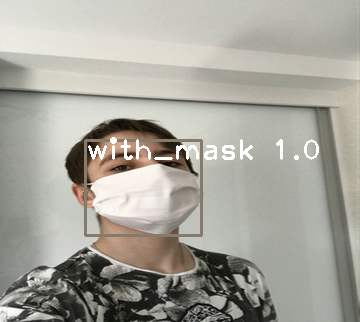

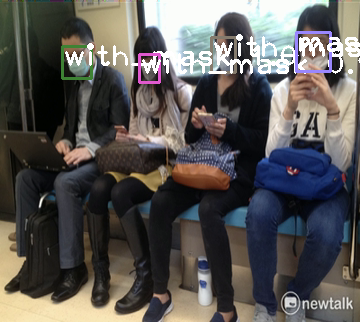

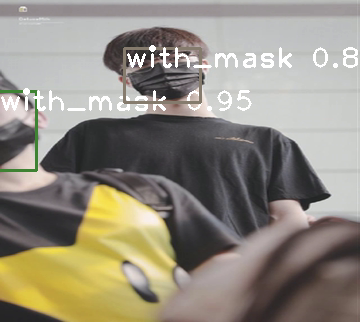

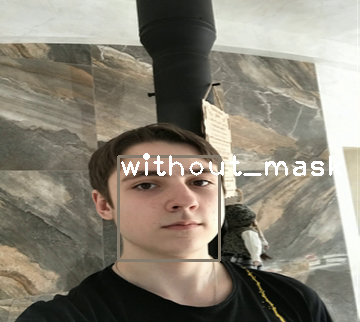

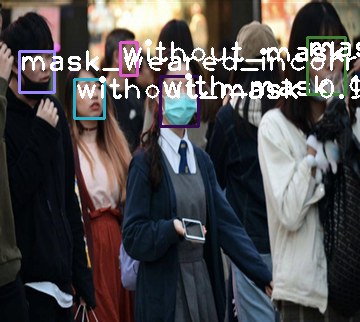

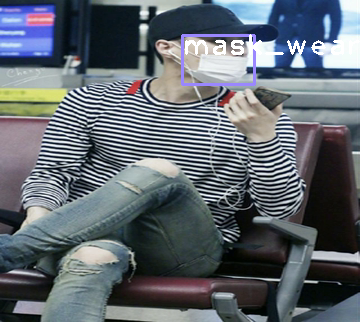

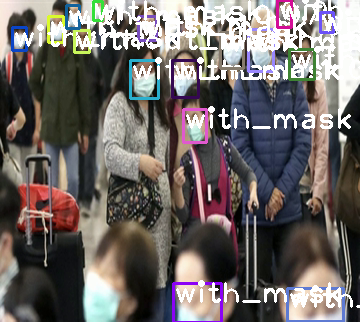

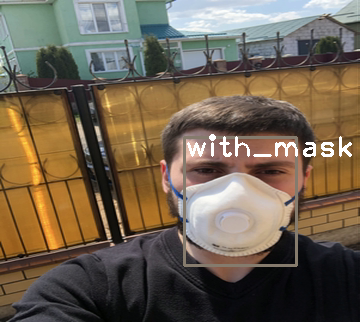

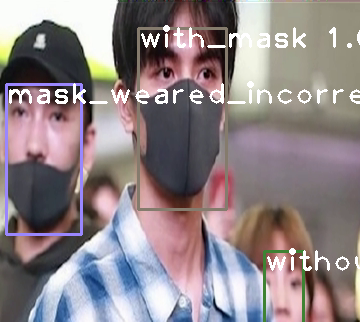

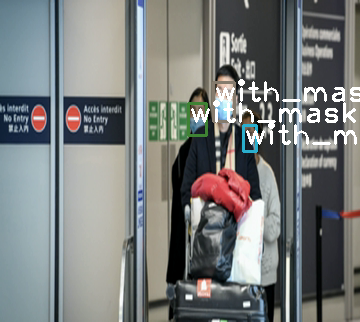

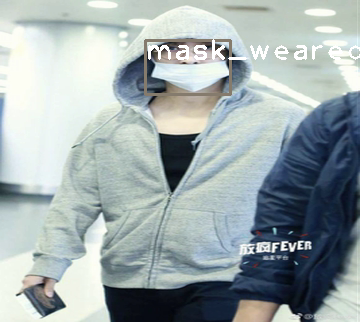

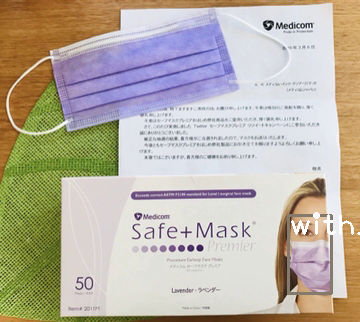

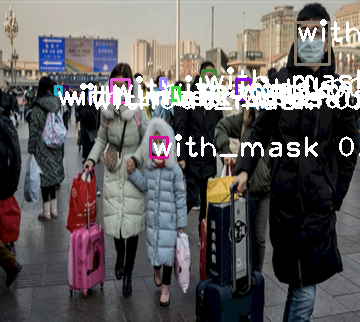

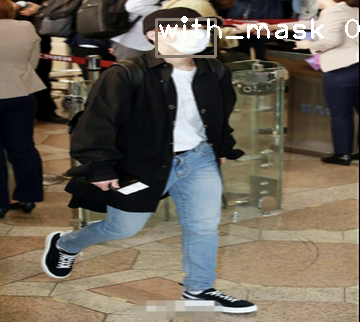

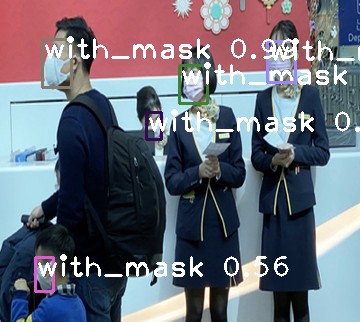

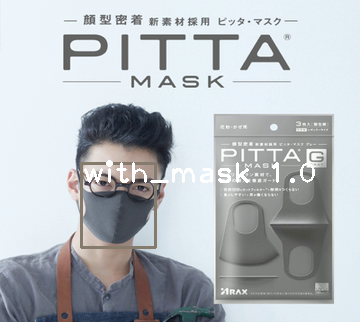

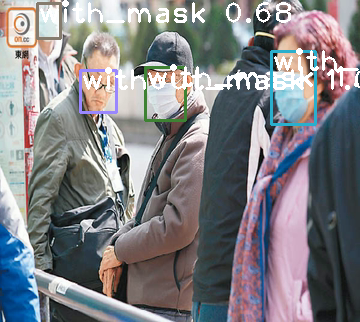

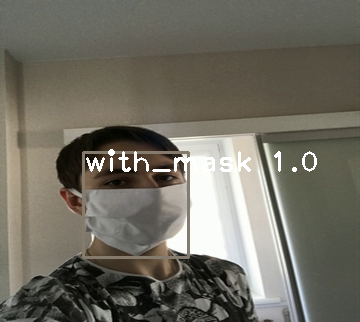

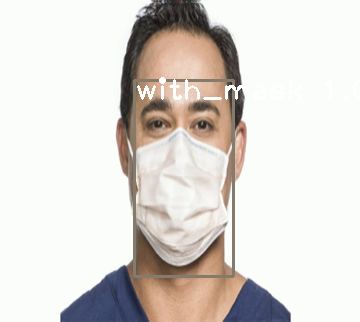

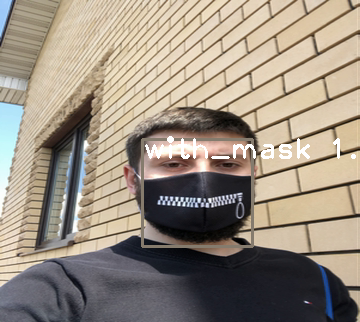

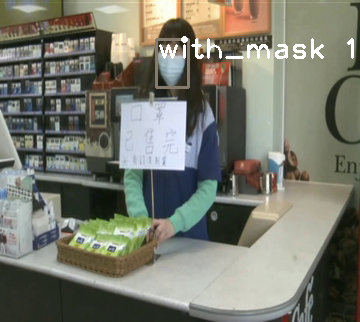

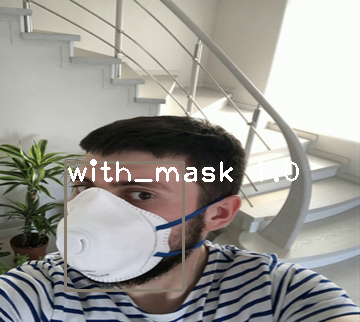

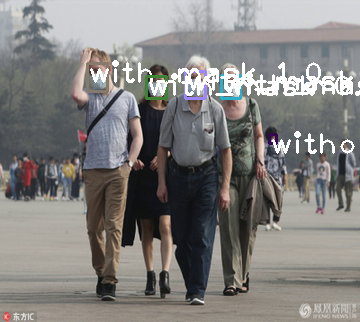

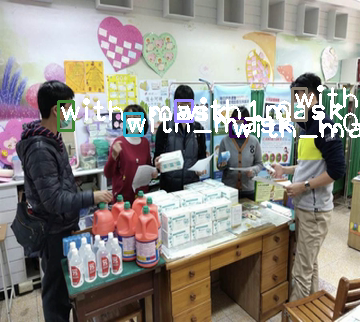

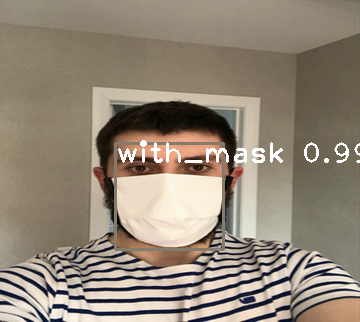

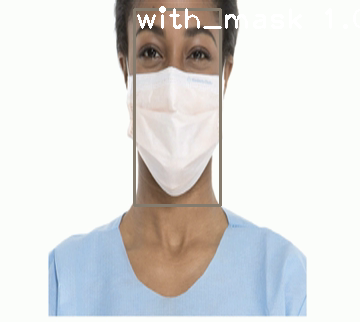

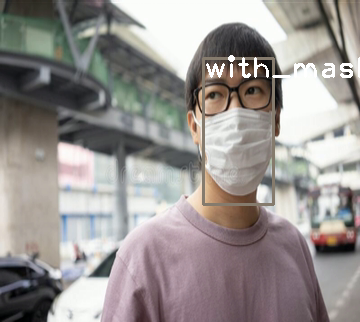

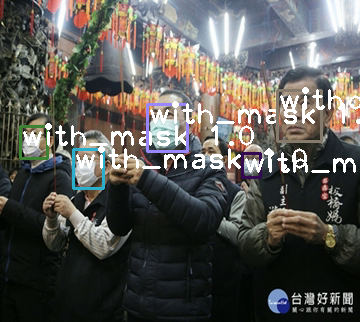

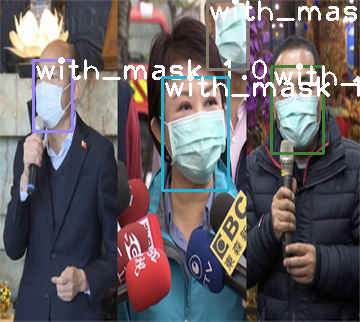

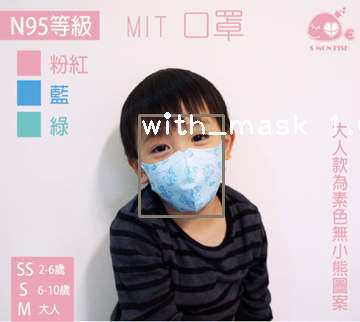

KeyboardInterrupt: ignored

In [8]:
import cv2
import numpy as np

net = cv2.dnn.readNet('/mydrive/yolov3/yolov3_training_last.weights', '/mydrive/yolov3/yolov3_testing.cfg')

classes = []
with open("/mydrive/yolov3/classes.txt", "r") as f:
    classes = f.read().splitlines()

cap = cv2.VideoCapture('/mydrive/yolov3/mygeneratedvideo.avi')
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

while True:
    _, img = cap.read()
    height, width, _ = img.shape

    blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers_names = net.getUnconnectedOutLayersNames()
    layerOutputs = net.forward(output_layers_names)

    boxes = []
    confidences = []
    class_ids = []

    for output in layerOutputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.2:
                center_x = int(detection[0]*width)
                center_y = int(detection[1]*height)
                w = int(detection[2]*width)
                h = int(detection[3]*height)

                x = int(center_x - w/2)
                y = int(center_y - h/2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.2, 0.4)

    if len(indexes)>0:
        for i in indexes.flatten():
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            confidence = str(round(confidences[i],2))
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)
    from google.colab.patches import cv2_imshow
    cv2_imshow(img)
    key = cv2.waitKey(1)
    if key==27:
        break

cap.release()
cv2.destroyAllWindows()